In [3]:
import os
import pandas as pd
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt
from bokeh.palettes import Spectral11

In [4]:
# Helper functions
def get_statements(dir):
    """
    :param dir: folder to look for statements in
    :return: a list with found statements
    """
    statements = []
    os.chdir(dir)
    for i in os.listdir('.'):
        if i.startswith('ACCT'):
            statements.append(i)
    return statements


def accum(d, key):
    """
    :param key: the source name (a col in the dataframe)
    :return: sum of transactions for the key
    """
    return key, d['amount'][d['source'] == key].sum()


def get_stats(d, data_pair):
    """

    :param data_pair: a tuple of (source_name, amount_sum)
    :return: the summary statistics
    """
    return d['amount'][d['source'] == data_pair[0]].describe()

## Parses Citibank csv statements

### How to use:
1. Download Statements for a single account in csv, into a directory
2. Change statements_location below, to point to the statements
3. Run cells of interest to see various outputs

In [5]:
statements_location = '/home/riptawr/Documents/PersonalDocs/'
statement_currency = 'RUR'

In [6]:
names = ['date', 'source', 'amount', 'acc_number']

d = pd.concat([pd.read_csv(f, header=None, names=names, encoding='utf-8-sig') for f in get_statements(statements_location)],
                  keys=get_statements(statements_location))

# clean data from strings that have extra quotes at start and finish (only issues i found so far)
for i in d['date'][d['date'].str.startswith('"')]:
    d['date'][d['date'] == i] = i[1:-1]

d['date'] = pd.to_datetime(d['date'], format='%d/%m/%Y')
d.set_index(['date'], inplace=True)

source_amount_pairs = []
for i in d['source'].unique():
    source_amount_pairs.append(accum(d, i))

sorted_stuff = sorted(source_amount_pairs, key=lambda x: x[1])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Various charts

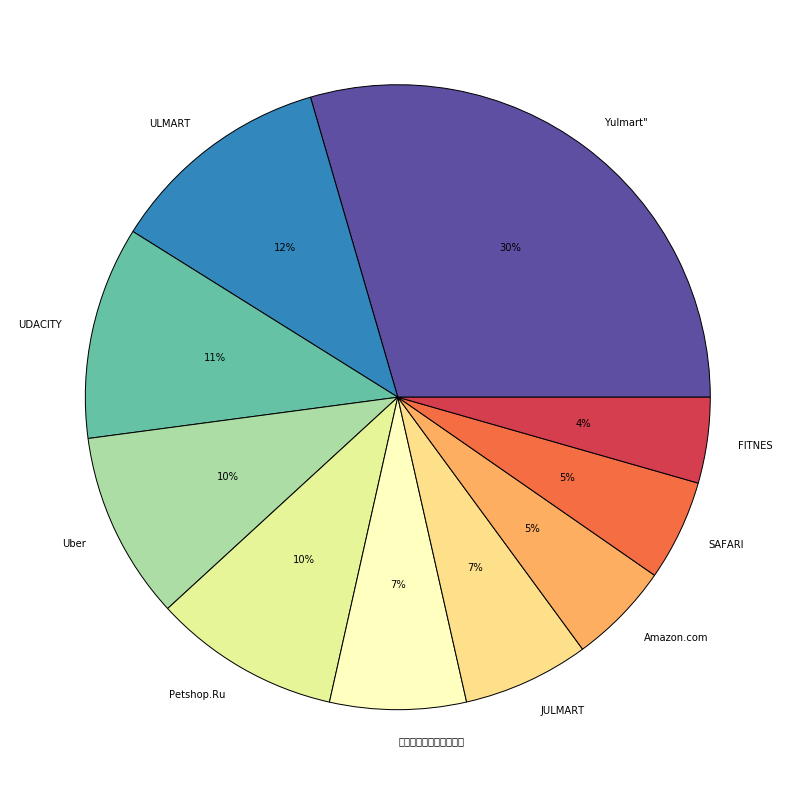

In [7]:
total_top_10 = np.sum([x[1] for x in sorted_stuff[:10]])
percentages = [x[1]/total_top_10 for x in sorted_stuff[:10]]
labels = [x[0].split(' ')[0] for x in sorted_stuff[:10]]
plt.figure(figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')
plt.pie(percentages, colors=Spectral11, labels=labels, autopct='%.0f%%')
plt.show()

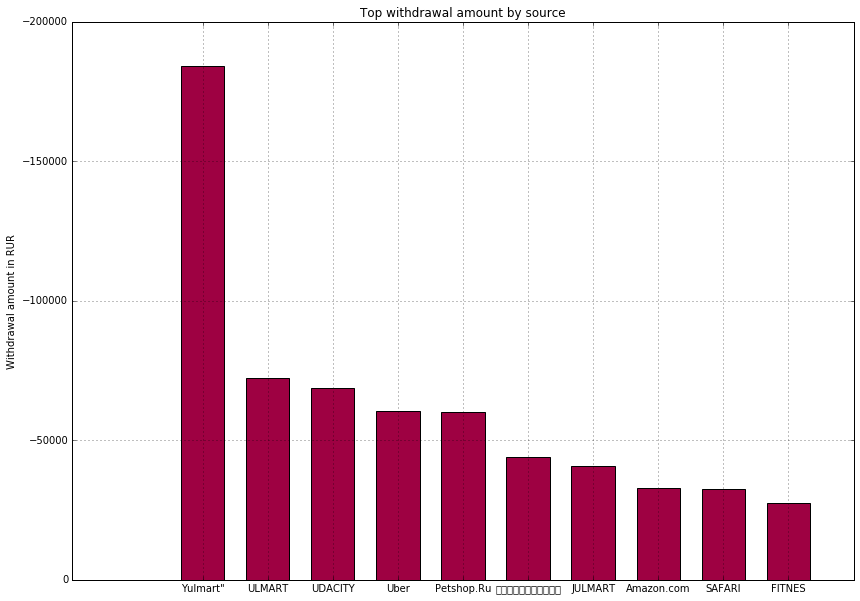

In [8]:
yval = [x[1] for x in sorted_stuff[:10]]
labels = [x[0].split(" ")[0] for x in sorted_stuff[:10]]
xval = [float(x) for x in range(len(labels))]

fig, ax = plt.subplots()
ax.set_ylabel('Withdrawal amount in '+ statement_currency)
ax.set_title("Top withdrawal amount by source")
ax.bar(xval,yval, 1/1.5, align='center', color=Spectral11[10])
ax.set_xticks(xval)
ax.set_xticklabels(labels)
ax.grid()
fig.set_size_inches(14,10)
fig.gca().invert_yaxis()
plt.show()

## Get stats for an item from the top 10

In [ ]:
top_10_sources = [x[0] for x in sorted_stuff[:10]]

In [28]:
# zero indexed
source = top_10_sources[0]

In [30]:
d['amount'][d['source'] == source].describe()

count        7.000000
mean    -26303.571429
std      22643.508112
min     -53876.000000
25%     -47271.000000
50%     -14855.000000
75%      -9317.500000
max      -2217.000000
Name: amount, dtype: float64